In [2]:
from Graph import Graph

In [72]:
import numpy as np

def transpose_graph(adj_matrix):
    num_nodes = len(adj_matrix)
    transposed = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            transposed[i][j] = adj_matrix[j][i]
    
    return transposed

def dfs(node, graph, visited, stack):
    visited[node] = True
    for neighbor, connected in enumerate(graph[node]):
        if not visited[neighbor] and connected:
            dfs(neighbor, graph, visited, stack)
    stack.append(node)

def kosaraju(graph):
    num_nodes = len(graph)
    visited = [False] * num_nodes
    stack = []
    
    # Первый этап: Обход графа и заполнение стека
    for node in range(num_nodes):
        if not visited[node]:
            dfs(node, graph, visited, stack)

    # Создание обратного графа
    transposed = transpose_graph(graph)

    visited = [False] * num_nodes
    strongly_connected_components = []

    # Второй этап: Обход графа в порядке убывания времени окончания обратного обхода
    while stack:
        node = stack.pop()
        if not visited[node]:
            component = []
            dfs(node, transposed, visited, component)
            strongly_connected_components.append(sorted(component))
    
    return strongly_connected_components

# # Пример матрицы смежности ориентированного графа
# adjacency_matrix = np.array(g.get_adjacency_matrix())

# # Вызов функции Косарайю для поиска компонент сильной связности
# strongly_connected_components = kosaraju(adjacency_matrix.tolist())

# # Вывод результатов
# for i, component in enumerate(strongly_connected_components):
#     print(f"Компонента {i + 1}: {component}")





def find_connected_components_in_graph(adj_matrix):

        
        num_nodes = len(adj_matrix)
        visited = [False] * num_nodes  # Список посещенных вершин
        components = []  # Список компонент связности

        # Функция для обхода в ширину
        def bfs(node):
            nonlocal visited
            component = []
            queue = deque([node])

            while queue:
                curr_node = queue.popleft()
                if not visited[curr_node]:
                    visited[curr_node] = True
                    component.append(curr_node)

                    for neighbor in range(num_nodes):
                        if adj_matrix[curr_node][neighbor] and not visited[neighbor]:
                            queue.append(neighbor)

            return component

            # Проход по всем вершинам графа
        for node in range(num_nodes):
            if not visited[node]:
                component = bfs(node)
                components.append(sorted(component))

            # Определение связности графа
        is_connected = len(components) == 1

        return is_connected, components

        
def directed_to_undirected(adj_matrix):
    
    # Преобразуем направленную матрицу смежности в неориентированную
    undirected_matrix = np.array(adj_matrix) + np.array(adj_matrix).T
    
    # Ограничим значения в матрице до 1 (если есть связь между вершинами, то 1, иначе 0)
    undirected_matrix[undirected_matrix > 1] = 1
    
    return undirected_matrix


    
def connected_components(graph : Graph):
    if not graph.is_directed:
        is_connected, components = find_connected_components_in_graph(graph.get_adjacency_matrix())
        num_components = len(components)
    
        print("Связность графа:", is_connected)
        print("Количество компонент связности:", num_components)
        print("Состав компонент связности:")
        for component in components:
            print(sorted(component))
    else:
        undirected_matrix = directed_to_undirected(graph.get_adjacency_matrix())
        # print(undirected_matrix)


        is_connected, components = find_connected_components_in_graph(undirected_matrix)
        num_components = len(components)

        print("Связность графа:", is_connected)
        print("Количество компонент связности:", num_components)
        print("Состав компонент связности:")
        print(components)

        # Пример матрицы смежности ориентированного графа
        adjacency_matrix = np.array(graph.get_adjacency_matrix())
        
        # Вызов функции Косарайю для поиска компонент сильной связности
        strongly_connected_components = kosaraju(adjacency_matrix.tolist())
        
        # Вывод результатов
        for i, component in enumerate(strongly_connected_components):
            print(f"Компонента {i + 1}: {component}")

            

Компонента 1: [49]
Компонента 2: [45]
Компонента 3: [44]
Компонента 4: [47]
Компонента 5: [41]
Компонента 6: [36]
Компонента 7: [32]
Компонента 8: [30]
Компонента 9: [28]
Компонента 10: [48]
Компонента 11: [29]
Компонента 12: [27]
Компонента 13: [25]
Компонента 14: [35]
Компонента 15: [19]
Компонента 16: [31]
Компонента 17: [16]
Компонента 18: [15]
Компонента 19: [39]
Компонента 20: [26]
Компонента 21: [10]
Компонента 22: [5]
Компонента 23: [33]
Компонента 24: [9]
Компонента 25: [4]
Компонента 26: [46]
Компонента 27: [40]
Компонента 28: [13]
Компонента 29: [3, 20, 24, 38]
Компонента 30: [11]
Компонента 31: [2, 6, 37]
Компонента 32: [18]
Компонента 33: [1]
Компонента 34: [0]
Компонента 35: [42]
Компонента 36: [43]
Компонента 37: [22]
Компонента 38: [12]
Компонента 39: [21]
Компонента 40: [17]
Компонента 41: [23]
Компонента 42: [7]
Компонента 43: [8]
Компонента 44: [34]
Компонента 45: [14]


<h1>
    From 12 matrix
<h1>

Связность графа: False
Количество компонент связности: 6
Состав компонент связности:
[[0, 7, 8, 12, 14, 17, 19, 21, 22, 23, 31, 34, 42, 43, 44, 47], [1, 2, 6, 18, 37], [3, 11, 20, 24, 38], [4, 10, 13, 25, 35, 40, 46], [5, 9, 16, 27, 33, 41], [15, 26, 28, 29, 30, 32, 36, 39, 45, 48, 49]]


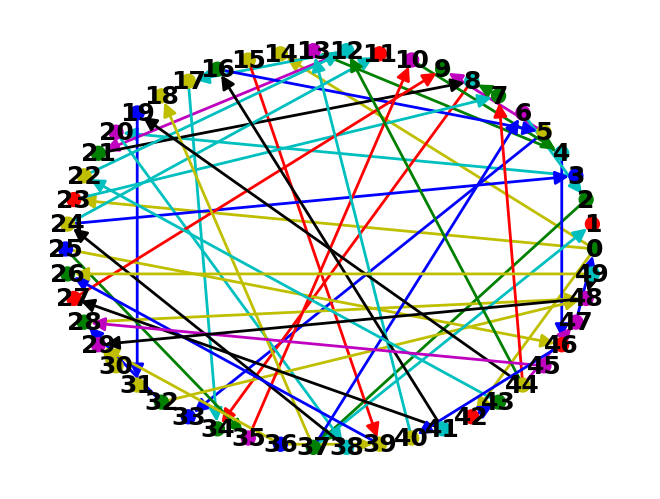

In [70]:
# from Graph import *

matrix_file = "task2/matrix_t2_013.txt"

g = Graph(matrix_file, "-m")
g.get_graph()
# g.connected_components()

connected_components(g)


# print(g._Graph__adjacency_matrix)


In [66]:
# def kosaraju(graph):
#     def dfs1(node):
#         visited[node] = True
#         for neighbor in graph[node]:
#             if not visited[neighbor]:
#                 dfs1(neighbor)
#         deq.appendleft(node)

#     def dfs2(node):
#         visited[node] = True
#         component.append(node)
#         for neighbor in reversed_graph[node]:
#             if not visited[neighbor]:
#                 dfs2(neighbor)

#     num_nodes = len(graph)
#     visited = [False] * num_nodes
#     deq = deque()

#     # Первый этап: Обратный обход графа и заполнение стека
#     for node in range(num_nodes):
#         if not visited[node]:
#             dfs1(node)

#     # Создаем обратный граф
#     reversed_graph = [[] for _ in range(num_nodes)]
#     for node in range(num_nodes):
#         for neighbor in graph[node]:
#             reversed_graph[neighbor].append(node)

#     visited = [False] * num_nodes
#     strongly_connected_components = []

#     # Второй этап: Обход графа в порядке убывания времени окончания обратного обхода
#     for node in deq:
#         if not visited[node]:
#             component = []
#             dfs2(node)
#             strongly_connected_components.append(component)

#     return strongly_connected_components

# # Пример матрицы смежности ориентированного графа
# adjacency_matrix = np.array(g._Graph__adjacency_matrix)

# # Преобразование матрицы смежности в список смежности
# graph = {}
# num_nodes = adjacency_matrix.shape[0]
# for i in range(num_nodes):
#     neighbors = [j for j in range(num_nodes) if adjacency_matrix[i][j] == 1]
#     graph[i] = neighbors

# # Вызов функции Косарайю для поиска компонент сильной связности
# strongly_connected_components = kosaraju(graph)

# # Вывод результатов
# for i, component in enumerate(strongly_connected_components):
#     print(f"Компонента {i + 1}: {component}")


In [63]:
import numpy as np

def transpose_graph(adj_matrix):
    num_nodes = len(adj_matrix)
    transposed = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            transposed[i][j] = adj_matrix[j][i]
    
    return transposed

def dfs(node, graph, visited, stack):
    visited[node] = True
    for neighbor, connected in enumerate(graph[node]):
        if not visited[neighbor] and connected:
            dfs(neighbor, graph, visited, stack)
    stack.append(node)

def kosaraju(graph):
    num_nodes = len(graph)
    visited = [False] * num_nodes
    stack = []
    
    # Первый этап: Обход графа и заполнение стека
    for node in range(num_nodes):
        if not visited[node]:
            dfs(node, graph, visited, stack)

    # Создание обратного графа
    transposed = transpose_graph(graph)

    visited = [False] * num_nodes
    strongly_connected_components = []

    # Второй этап: Обход графа в порядке убывания времени окончания обратного обхода
    while stack:
        node = stack.pop()
        if not visited[node]:
            component = []
            dfs(node, transposed, visited, component)
            strongly_connected_components.append(sorted(component))
    
    return strongly_connected_components

# Пример матрицы смежности ориентированного графа
adjacency_matrix = np.array(g.get_adjacency_matrix())

# Вызов функции Косарайю для поиска компонент сильной связности
strongly_connected_components = kosaraju(adjacency_matrix.tolist())

# Вывод результатов
for i, component in enumerate(strongly_connected_components):
    print(f"Компонента {i + 1}: {component}")


Компонента 1: [49]
Компонента 2: [45]
Компонента 3: [44]
Компонента 4: [47]
Компонента 5: [41]
Компонента 6: [36]
Компонента 7: [32]
Компонента 8: [30]
Компонента 9: [28]
Компонента 10: [48]
Компонента 11: [29]
Компонента 12: [27]
Компонента 13: [25]
Компонента 14: [35]
Компонента 15: [19]
Компонента 16: [31]
Компонента 17: [16]
Компонента 18: [15]
Компонента 19: [39]
Компонента 20: [26]
Компонента 21: [10]
Компонента 22: [5]
Компонента 23: [33]
Компонента 24: [9]
Компонента 25: [4]
Компонента 26: [46]
Компонента 27: [40]
Компонента 28: [13]
Компонента 29: [3, 20, 24, 38]
Компонента 30: [11]
Компонента 31: [2, 6, 37]
Компонента 32: [18]
Компонента 33: [1]
Компонента 34: [0]
Компонента 35: [42]
Компонента 36: [43]
Компонента 37: [22]
Компонента 38: [12]
Компонента 39: [21]
Компонента 40: [17]
Компонента 41: [23]
Компонента 42: [7]
Компонента 43: [8]
Компонента 44: [34]
Компонента 45: [14]


<h1>
    From 13 list
<h1>

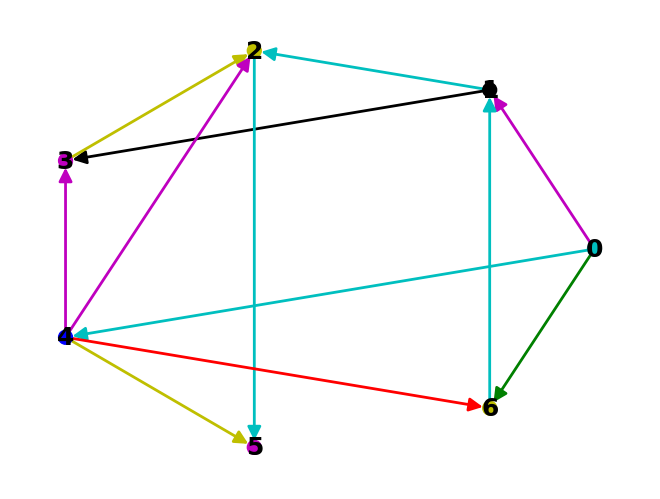

In [110]:
list_file = 'task2/list_of_adjacency_t2_005.txt'

g = Graph(list_file, '-l')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()
# g = Graph(matrix_file, "-m")
# g.get_graph()
# g.connected_components()

# g.connected_components()
g.connected_components()

<h1>
    From 1 edge
<h1>

True

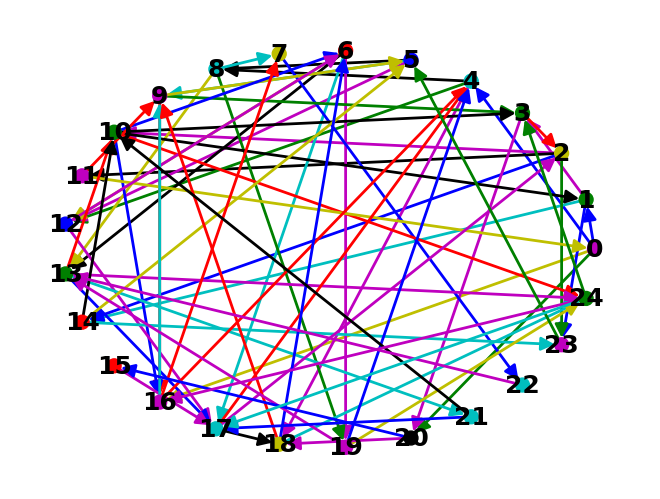

In [79]:
edge_file = 'task2/list_of_edges_t2_008.txt'

g = Graph(edge_file, '-e')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()